In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [2]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 

In [3]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
#from wikipedia2vec import Wikipedia2Vec

#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords


vectorDim = 100

numNode = 1000

reps = 20
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



#here is a small bit of data to train the reservoir.  We dont care
# if it learns because we are analysing the reseroir units, and
#not the readouts

in_small = np.load('in_small.npy')
out_small = np.load('out_small.npy')

Using Numpy backend.


In [4]:
#reservoirStatesBuffer[:,:resn]


print(len(in_small))
print(len(out_small))

10000
10000


In [5]:
#here we import the word vectors for the intact and shifted 
# not the fall texts.  Avoids using the big wikipedia2vec pkl file

inputDataTestingIntact = np.load('inputDataTestingIntact.npy')
inputDataTestingShift = np.load('inputDataTestingShift.npy')


In [6]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 3.sort;  4. segment (ubuntu)

for res_seed in range(reps):
 
    ###################################################################
    #
    #               1.1 run reservoir on intact text


    # set the seed
    np.random.seed(res_seed)

    # set up the reservoir
    # leakingRate=0.2 changing too fast, mutliple with 0.05; changed
    esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=False)

    # train the reervoir with a new seed
    esn.fit(in_small, out_small, transientTime="Auto", verbose=1)

    # modify the reservoir topology for input

    
    # and for the reservoir _W matrix

    #run the reservoir
    reservoirStatesBuffer = np.empty((0,numNode))
    prediction,reservoirStatesBuffer  = esn.predict(inputDataTestingIntact)
    reservoirStatesBuffer = reservoirStatesBuffer.T
    print(reservoirStatesBuffer.shape)
    reservoirStatesBuffer = reservoirStatesBuffer[:,101:]
    print(reservoirStatesBuffer.shape)
    print(prediction.shape)

    reservoirStatesBuffer1 = reservoirStatesBuffer

    
    


    ###################################################################
    #
    #               4. Segment
    

    # get the pieces
    #NTF_time1=NTF_SortedStates[:,0:99]
    #NTF_time2=NTF_SortedStates[:,900:999]
    
    NTF_time1=reservoirStatesBuffer[:,200:299]
    NTF_time1test=reservoirStatesBuffer[:,300:399]

    
    NTF_time2=reservoirStatesBuffer[:,500:599]
    NTF_time2test=reservoirStatesBuffer[:,600:699]
 
    if res_seed == 0:
        NTF_time1_cumul = NTF_time1
        NTF_time2_cumul = NTF_time2
    else:
        NTF_time1_cumul = NTF_time1 + NTF_time1_cumul
        NTF_time2_cumul = NTF_time2 + NTF_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing
        

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(NTF_time1)

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(NTF_time2)
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_
        
 

        # save likelihood scores
        #likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        #likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        a,likelihood[iteration, res_seed,0] = ev_time1.find_events(NTF_time1test)
        a,likelihood[iteration, res_seed,1] = ev_time2.find_events(NTF_time2test)


        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


100% (9904 of 9904) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  0
Likelihood
-1155.735720409763
-1161.5955445385825
4
res_seed =  0
Likelihood
-1175.0007973631364
-1177.1745101242564
6
res_seed =  0
Likelihood
-1192.8325778494332
-1195.8297869857292
8
res_seed =  0
Likelihood
-1206.3607622146135
-1214.5232381813817
10
res_seed =  0
Likelihood
-1228.570410935243
-1228.7133314114392
12
res_seed =  0
Likelihood
-1248.2623193927616
-1246.4304029684793
14
res_seed =  0
Likelihood
-1250.1084347718997
-1254.2548008977906
16
res_seed =  0
Likelihood
-1265.2208536563598
-1276.1377455768063
18
res_seed =  0
Likelihood
-1274.6978457595037
-1281.9519052474695
20
res_seed =  0
Likelihood
-1292.426388876339
-1299.317812723012
22
res_seed =  0
Likelihood
-1313.5973067645998
-1316.9604888796953
24
res_seed =  0
Likelihood
-1339.4795403177222
-1336.7423742233418
26
res_seed =  0
Likelihood
-1336.4222793503377
-1337.589820363212
28
res_seed =  0
Likelihood
-1369.941933584632
-1368.8096914334744
30
res_seed =  0
Likeli

100% (9906 of 9906) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  1
Likelihood
-1186.581624633425
-1187.5680961246169
4
res_seed =  1
Likelihood
-1183.820996776317
-1203.0584615241526
6
res_seed =  1
Likelihood
-1196.1165097382793
-1184.181999539702
8
res_seed =  1
Likelihood
-1206.9378561455121
-1194.3069942614034
10
res_seed =  1
Likelihood
-1213.96979894211
-1213.1410896932944
12
res_seed =  1
Likelihood
-1207.6787817886454
-1230.5631373409165
14
res_seed =  1
Likelihood
-1218.854295765166
-1252.9360469360063
16
res_seed =  1
Likelihood
-1236.717337539836
-1274.2490250940207
18
res_seed =  1
Likelihood
-1179.1367928541456
-1291.0564105241901
20
res_seed =  1
Likelihood
-1197.755545915564
-1309.2850850134146
22
res_seed =  1
Likelihood
-1212.7394713018964
-1327.2557529753167
24
res_seed =  1
Likelihood
-1228.5629541852468
-1344.3667518797738
26
res_seed =  1
Likelihood
-1244.5991199029988
-1367.0393565125369
28
res_seed =  1
Likelihood
-1250.8615531276262
-1388.3318084372713
30
res_seed =  1
Likeliho

100% (9902 of 9902) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  2
Likelihood
-1191.5693507258736
-1185.3767518288355
4
res_seed =  2
Likelihood
-1209.0164669331102
-1169.4400887929835
6
res_seed =  2
Likelihood
-1219.3156772447937
-1178.3266187441275
8
res_seed =  2
Likelihood
-1222.2020130663504
-1200.2088277929176
10
res_seed =  2
Likelihood
-1227.3901283800967
-1198.233694354576
12
res_seed =  2
Likelihood
-1243.577843972537
-1219.6512077992836
14
res_seed =  2
Likelihood
-1217.365153516462
-1238.887222393035
16
res_seed =  2
Likelihood
-1228.580005502077
-1260.799594862217
18
res_seed =  2
Likelihood
-1243.4389288078542
-1265.2121025352062
20
res_seed =  2
Likelihood
-1269.1822482123887
-1282.0003437376595
22
res_seed =  2
Likelihood
-1286.2350481145988
-1315.59955169507
24
res_seed =  2
Likelihood
-1304.0100945622141
-1320.1852227388338
26
res_seed =  2
Likelihood
-1319.0509667670499
-1345.338050938861
28
res_seed =  2
Likelihood
-1352.2544189467633
-1356.8290765604809
30
res_seed =  2
Likelihoo

100% (9906 of 9906) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  3
Likelihood
-1203.0335708171642
-1183.4325892307638
4
res_seed =  3
Likelihood
-1181.2663041186252
-1186.1086553708797
6
res_seed =  3
Likelihood
-1195.6429439617264
-1193.8970637799048
8
res_seed =  3
Likelihood
-1213.9151681543337
-1188.6126794416193
10
res_seed =  3
Likelihood
-1218.628161223248
-1193.8455885937365
12
res_seed =  3
Likelihood
-1236.3937290570125
-1232.0277274819387
14
res_seed =  3
Likelihood
-1227.62523681988
-1238.414872963341
16
res_seed =  3
Likelihood
-1238.1485029219002
-1258.691444883153
18
res_seed =  3
Likelihood
-1251.506002094035
-1280.864716929628
20
res_seed =  3
Likelihood
-1271.9859132783536
-1297.4753606521167
22
res_seed =  3
Likelihood
-1295.6621392333993
-1316.1649901960263
24
res_seed =  3
Likelihood
-1313.2025175700235
-1334.5153948720606
26
res_seed =  3
Likelihood
-1332.040465746569
-1355.2378524990488
28
res_seed =  3
Likelihood
-1348.6848071926865
-1374.1360367459274
30
res_seed =  3
Likeliho

100% (9903 of 9903) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  4
Likelihood
-1203.9123515380002
-1177.0077647098176
4
res_seed =  4
Likelihood
-1201.6831922749338
-1180.9315496527715
6
res_seed =  4
Likelihood
-1217.3329763840363
-1194.5375690641958
8
res_seed =  4
Likelihood
-1235.0385813486105
-1206.3077413595652
10
res_seed =  4
Likelihood
-1244.0522891880498
-1219.0557115800284
12
res_seed =  4
Likelihood
-1255.0946016403493
-1242.3706544255765
14
res_seed =  4
Likelihood
-1233.3827820760596
-1262.7410251085064
16
res_seed =  4
Likelihood
-1255.7550442967784
-1275.1617475916355
18
res_seed =  4
Likelihood
-1270.8115865685866
-1295.6147764694622
20
res_seed =  4
Likelihood
-1295.6221044568274
-1309.6019053166078
22
res_seed =  4
Likelihood
-1308.0317692268916
-1325.1737875568313
24
res_seed =  4
Likelihood
-1328.0523598732245
-1346.28352744313
26
res_seed =  4
Likelihood
-1326.8805994556992
-1365.6132286691493
28
res_seed =  4
Likelihood
-1355.790506868992
-1398.7957260965832
30
res_seed =  4
Lik

100% (9908 of 9908) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  5
Likelihood
-1164.6529818832225
-1139.9462247208032
4
res_seed =  5
Likelihood
-1158.150577227784
-1176.7199398091725
6
res_seed =  5
Likelihood
-1160.2335645509434
-1195.4495747866217
8
res_seed =  5
Likelihood
-1199.5479617610226
-1198.7858215993408
10
res_seed =  5
Likelihood
-1218.0711937079172
-1217.1559712691794
12
res_seed =  5
Likelihood
-1228.87540110315
-1227.4386400280885
14
res_seed =  5
Likelihood
-1252.4180250471395
-1253.5260676365042
16
res_seed =  5
Likelihood
-1264.8903982305592
-1263.6660099405592
18
res_seed =  5
Likelihood
-1272.5798715728804
-1281.4116284358533
20
res_seed =  5
Likelihood
-1302.7211832799228
-1315.364760406736
22
res_seed =  5
Likelihood
-1319.2920194014048
-1326.358743151983
24
res_seed =  5
Likelihood
-1321.5961158366363
-1345.5868208364673
26
res_seed =  5
Likelihood
-1342.6123548696512
-1370.9280691803608
28
res_seed =  5
Likelihood
-1373.7142664374635
-1376.5271601555378
30
res_seed =  5
Likel

100% (9905 of 9905) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  6
Likelihood
-1205.9780882178104
-1172.190147759364
4
res_seed =  6
Likelihood
-1189.2821661604596
-1142.7022366866408
6
res_seed =  6
Likelihood
-1201.7091773900427
-1150.6080242872074
8
res_seed =  6
Likelihood
-1223.8815142701837
-1175.9455945643895
10
res_seed =  6
Likelihood
-1237.3739888983296
-1189.4675108339216
12
res_seed =  6
Likelihood
-1254.9308241956055
-1208.201947233622
14
res_seed =  6
Likelihood
-1274.9170686094208
-1220.7967017849473
16
res_seed =  6
Likelihood
-1285.4951415583096
-1211.1231046880603
18
res_seed =  6
Likelihood
-1304.9037069365008
-1226.123135873894
20
res_seed =  6
Likelihood
-1318.099272740675
-1252.153120515643
22
res_seed =  6
Likelihood
-1336.2053325677366
-1269.4835550121425
24
res_seed =  6
Likelihood
-1355.6834694824095
-1285.65580353658
26
res_seed =  6
Likelihood
-1367.599212905621
-1276.8055080784948
28
res_seed =  6
Likelihood
-1399.0591658749627
-1294.2221914054946
30
res_seed =  6
Likeliho

100% (9903 of 9903) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  7
Likelihood
-1184.9786930117903
-1169.3022791865924
4
res_seed =  7
Likelihood
-1152.830489180611
-1195.9590471057002
6
res_seed =  7
Likelihood
-1164.7540162536707
-1201.6407305584303
8
res_seed =  7
Likelihood
-1185.6362430915983
-1217.8085668881163
10
res_seed =  7
Likelihood
-1191.8267844469153
-1225.4459670205986
12
res_seed =  7
Likelihood
-1212.7584802109686
-1238.4697490577141
14
res_seed =  7
Likelihood
-1224.0006941166703
-1257.1255597876732
16
res_seed =  7
Likelihood
-1247.8698637164382
-1271.1729518511204
18
res_seed =  7
Likelihood
-1264.2501372126471
-1292.0828887722546
20
res_seed =  7
Likelihood
-1281.4147815768317
-1317.1757999474357
22
res_seed =  7
Likelihood
-1297.9000107336997
-1324.096123940405
24
res_seed =  7
Likelihood
-1323.0456448877082
-1343.9275808584246
26
res_seed =  7
Likelihood
-1343.2109883389003
-1352.214481742748
28
res_seed =  7
Likelihood
-1365.0344541813113
-1385.9486584786878
30
res_seed =  7
Lik

100% (9901 of 9901) |####################| Elapsed Time: 0:00:08 Time:  0:00:08


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  8
Likelihood
-1187.6216769411394
-1165.376236901874
4
res_seed =  8
Likelihood
-1195.7239652392445
-1151.4489960839946
6
res_seed =  8
Likelihood
-1221.7485764648081
-1165.9300588085255
8
res_seed =  8
Likelihood
-1216.841832902033
-1179.2781853441195
10
res_seed =  8
Likelihood
-1230.493693739606
-1204.2767852386646
12
res_seed =  8
Likelihood
-1239.4510761487093
-1220.7584540554121
14
res_seed =  8
Likelihood
-1255.0775206620945
-1240.5042091886212
16
res_seed =  8
Likelihood
-1265.4352444247288
-1261.9109353328918
18
res_seed =  8
Likelihood
-1286.5955889855309
-1277.471734931051
20
res_seed =  8
Likelihood
-1303.6599267976585
-1302.7903041993604
22
res_seed =  8
Likelihood
-1322.4703000374948
-1313.6790880641997
24
res_seed =  8
Likelihood
-1353.0924658171402
-1339.8413539384785
26
res_seed =  8
Likelihood
-1365.4378399070317
-1323.445990547356
28
res_seed =  8
Likelihood
-1383.075477514461
-1345.1143849818523
30
res_seed =  8
Likeli

100% (9910 of 9910) |####################| Elapsed Time: 0:00:08 Time:  0:00:08


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  9
Likelihood
-1177.4467061873631
-1196.727126548893
4
res_seed =  9
Likelihood
-1162.9538209277887
-1199.9227288863892
6
res_seed =  9
Likelihood
-1165.6186813732488
-1217.7090523629881
8
res_seed =  9
Likelihood
-1186.6339062119425
-1200.4992168289662
10
res_seed =  9
Likelihood
-1201.9627883707449
-1238.2711356968327
12
res_seed =  9
Likelihood
-1204.0802640825195
-1254.884891806293
14
res_seed =  9
Likelihood
-1219.4359875366586
-1269.1526793058388
16
res_seed =  9
Likelihood
-1198.378221501872
-1283.019005335317
18
res_seed =  9
Likelihood
-1212.4125808123126
-1300.1902744438785
20
res_seed =  9
Likelihood
-1230.9260202321454
-1322.346032640399
22
res_seed =  9
Likelihood
-1240.8298427454229
-1341.2189178287226
24
res_seed =  9
Likelihood
-1259.916390411677
-1364.007697913148
26
res_seed =  9
Likelihood
-1277.1747234549607
-1383.837421697812
28
res_seed =  9
Likelihood
-1297.3815301771356
-1397.0332927043662
30
res_seed =  9
Likeliho

100% (9899 of 9899) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  10
Likelihood
-1180.5428048467866
-1184.2228767728195
4
res_seed =  10
Likelihood
-1166.1228106104472
-1194.75135555094
6
res_seed =  10
Likelihood
-1178.4909197669865
-1210.2946860716374
8
res_seed =  10
Likelihood
-1196.9631651290103
-1220.1015654355951
10
res_seed =  10
Likelihood
-1216.3938984023996
-1242.3701865882176
12
res_seed =  10
Likelihood
-1238.702138360095
-1263.3111182978585
14
res_seed =  10
Likelihood
-1259.8629874211524
-1263.4202943839439
16
res_seed =  10
Likelihood
-1281.7974443387595
-1283.5837622680012
18
res_seed =  10
Likelihood
-1299.042155230921
-1306.4392482181527
20
res_seed =  10
Likelihood
-1318.016274799935
-1310.1088154290514
22
res_seed =  10
Likelihood
-1336.199250651627
-1321.0077481951082
24
res_seed =  10
Likelihood
-1348.8245790254628
-1340.5765332994872
26
res_seed =  10
Likelihood
-1368.1320157876783
-1362.660726255523
28
res_seed =  10
Likelihood
-1390.545535868417
-1395.3112884897553
30
res_seed

100% (9906 of 9906) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  11
Likelihood
-1171.0241166544372
-1197.1566511677693
4
res_seed =  11
Likelihood
-1177.4342289483486
-1171.5929328727098
6
res_seed =  11
Likelihood
-1192.4616415015184
-1199.1042704822196
8
res_seed =  11
Likelihood
-1209.1919033053405
-1206.6198775514715
10
res_seed =  11
Likelihood
-1233.4442448294046
-1221.2685641048004
12
res_seed =  11
Likelihood
-1219.3290118938403
-1207.3996353971902
14
res_seed =  11
Likelihood
-1238.3247724108207
-1239.1865487752189
16
res_seed =  11
Likelihood
-1259.145203145654
-1244.8970287635145
18
res_seed =  11
Likelihood
-1269.24417538214
-1263.1528281238798
20
res_seed =  11
Likelihood
-1286.2128421394648
-1277.9703255983004
22
res_seed =  11
Likelihood
-1304.7601429040628
-1298.9374426451081
24
res_seed =  11
Likelihood
-1332.2492318055943
-1322.7739794788374
26
res_seed =  11
Likelihood
-1344.63953708681
-1333.2448633696847
28
res_seed =  11
Likelihood
-1361.47535267483
-1364.1584459330672
30
res_see

100% (9906 of 9906) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  12
Likelihood
-1197.5348658113667
-1207.3262833450963
4
res_seed =  12
Likelihood
-1196.5767258718554
-1197.3085146741055
6
res_seed =  12
Likelihood
-1193.6508497549382
-1218.5458996326176
8
res_seed =  12
Likelihood
-1218.5702952785916
-1223.852149300404
10
res_seed =  12
Likelihood
-1222.9836620924216
-1242.7354619150651
12
res_seed =  12
Likelihood
-1237.4223296620949
-1245.3722403269333
14
res_seed =  12
Likelihood
-1267.6219913174118
-1259.0616629193446
16
res_seed =  12
Likelihood
-1270.854484146151
-1251.420236449315
18
res_seed =  12
Likelihood
-1293.6690500940235
-1267.377016208613
20
res_seed =  12
Likelihood
-1308.8029906858376
-1305.903241956452
22
res_seed =  12
Likelihood
-1337.5555526087198
-1324.2742804327925
24
res_seed =  12
Likelihood
-1355.4824375900168
-1340.2903328879192
26
res_seed =  12
Likelihood
-1366.8975261331962
-1360.2939970230216
28
res_seed =  12
Likelihood
-1399.1695303778656
-1392.0050972637164
30
res_s

100% (9901 of 9901) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  13
Likelihood
-1204.4249856563963
-1200.7760419403098
4
res_seed =  13
Likelihood
-1205.7669155402766
-1201.067340042127
6
res_seed =  13
Likelihood
-1208.9193727833856
-1192.8674845018077
8
res_seed =  13
Likelihood
-1223.4674982702309
-1230.1907896548366
10
res_seed =  13
Likelihood
-1243.176461714347
-1194.151368505473
12
res_seed =  13
Likelihood
-1258.0254608552546
-1233.5859815924437
14
res_seed =  13
Likelihood
-1262.8112562505833
-1228.4230888631826
16
res_seed =  13
Likelihood
-1284.1655741240704
-1266.2445511644764
18
res_seed =  13
Likelihood
-1299.994806423569
-1287.4148219599904
20
res_seed =  13
Likelihood
-1325.1433849810585
-1305.1230661629988
22
res_seed =  13
Likelihood
-1313.4946739164695
-1314.6909233261424
24
res_seed =  13
Likelihood
-1362.9253474452587
-1343.4276849426135
26
res_seed =  13
Likelihood
-1352.990755054773
-1353.119725237785
28
res_seed =  13
Likelihood
-1386.2034453371734
-1385.7166629096348
30
res_se

100% (9901 of 9901) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  14
Likelihood
-1191.5841776575662
-1149.2168600778014
4
res_seed =  14
Likelihood
-1205.2055457128015
-1136.149113719853
6
res_seed =  14
Likelihood
-1197.9185084095323
-1145.985665364941
8
res_seed =  14
Likelihood
-1209.344385233846
-1161.9346265522756
10
res_seed =  14
Likelihood
-1221.9301608800781
-1177.3209439851364
12
res_seed =  14
Likelihood
-1236.8850589009674
-1126.4954674523615
14
res_seed =  14
Likelihood
-1249.3641671253383
-1139.3092838152245
16
res_seed =  14
Likelihood
-1241.2169164313493
-1153.71832182612
18
res_seed =  14
Likelihood
-1256.724760640685
-1209.3161116158742
20
res_seed =  14
Likelihood
-1281.8691503928392
-1223.9840483533155
22
res_seed =  14
Likelihood
-1300.2219132500736
-1247.8688199296207
24
res_seed =  14
Likelihood
-1305.1856961218941
-1257.6984124359633
26
res_seed =  14
Likelihood
-1325.2563817991445
-1277.8032195375463
28
res_seed =  14
Likelihood
-1344.8096535563832
-1323.1585308828282
30
res_se

100% (9901 of 9901) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  15
Likelihood
-1198.4809186645184
-1208.5836613777751
4
res_seed =  15
Likelihood
-1195.4766865594327
-1199.766483308226
6
res_seed =  15
Likelihood
-1215.1987410292113
-1190.1994402485204
8
res_seed =  15
Likelihood
-1183.9041874869545
-1209.7773317110896
10
res_seed =  15
Likelihood
-1231.735563095572
-1227.394616602714
12
res_seed =  15
Likelihood
-1215.1962060133342
-1230.7691585343896
14
res_seed =  15
Likelihood
-1236.787387858229
-1243.869620816722
16
res_seed =  15
Likelihood
-1255.7684428870934
-1269.2923937785883
18
res_seed =  15
Likelihood
-1271.4365858797664
-1277.7356697293937
20
res_seed =  15
Likelihood
-1299.9018305669038
-1303.0799538331748
22
res_seed =  15
Likelihood
-1307.964981014545
-1321.1828705223
24
res_seed =  15
Likelihood
-1327.1201760625647
-1339.4721806120544
26
res_seed =  15
Likelihood
-1347.7692773556184
-1360.0275327195588
28
res_seed =  15
Likelihood
-1365.5925377844612
-1382.7368154036635
30
res_seed 

100% (9901 of 9901) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  16
Likelihood
-1197.9514874822887
-1186.4802145780106
4
res_seed =  16
Likelihood
-1213.9950671436443
-1179.334892244266
6
res_seed =  16
Likelihood
-1227.2240103986894
-1190.4521959409765
8
res_seed =  16
Likelihood
-1246.9383730339316
-1176.186924730735
10
res_seed =  16
Likelihood
-1267.3637567939286
-1216.300807828479
12
res_seed =  16
Likelihood
-1271.1067634121027
-1237.7409030060319
14
res_seed =  16
Likelihood
-1264.0404827526108
-1219.139967695629
16
res_seed =  16
Likelihood
-1283.9711806044684
-1269.538089496796
18
res_seed =  16
Likelihood
-1300.5848395446528
-1194.8478403161114
20
res_seed =  16
Likelihood
-1316.6697686176217
-1217.7363164768249
22
res_seed =  16
Likelihood
-1343.2540990347734
-1239.0832399950425
24
res_seed =  16
Likelihood
-1363.999622465338
-1247.5820745317678
26
res_seed =  16
Likelihood
-1376.6366006802598
-1272.0774804629382
28
res_seed =  16
Likelihood
-1408.2901815423627
-1292.3833020884701
30
res_se

100% (9905 of 9905) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  17
Likelihood
-1165.8179710533125
-1195.0657322964073
4
res_seed =  17
Likelihood
-1175.6705234525718
-1162.3176971678029
6
res_seed =  17
Likelihood
-1191.254011442441
-1167.0891000714535
8
res_seed =  17
Likelihood
-1207.1205657445187
-1190.6773662357255
10
res_seed =  17
Likelihood
-1200.1111842991234
-1169.9028142725197
12
res_seed =  17
Likelihood
-1221.0199516959935
-1184.1920791084372
14
res_seed =  17
Likelihood
-1254.5988556773375
-1228.4731500104813
16
res_seed =  17
Likelihood
-1254.2275686664343
-1247.2477141628508
18
res_seed =  17
Likelihood
-1276.747830726787
-1254.9208205018858
20
res_seed =  17
Likelihood
-1291.2964089413272
-1257.4471567026035
22
res_seed =  17
Likelihood
-1315.4053021178177
-1274.5535576290767
24
res_seed =  17
Likelihood
-1337.6978067635998
-1293.0159885645069
26
res_seed =  17
Likelihood
-1357.3682108865871
-1310.3366679063847
28
res_seed =  17
Likelihood
-1381.3214030859026
-1255.041167352304
30
res

100% (9903 of 9903) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  18
Likelihood
-1152.7401464668735
-1200.555952723518
4
res_seed =  18
Likelihood
-1180.9467562386726
-1173.0717164020903
6
res_seed =  18
Likelihood
-1155.3946067953486
-1201.8451893789481
8
res_seed =  18
Likelihood
-1171.141667013434
-1214.0897094610198
10
res_seed =  18
Likelihood
-1176.9254022404764
-1182.818120707347
12
res_seed =  18
Likelihood
-1190.2466058958075
-1227.8726819110836
14
res_seed =  18
Likelihood
-1206.977844990185
-1214.529100392357
16
res_seed =  18
Likelihood
-1174.9898187030265
-1236.9837958000403
18
res_seed =  18
Likelihood
-1189.8164455354686
-1249.9361822953852
20
res_seed =  18
Likelihood
-1203.9527408273748
-1265.115861535914
22
res_seed =  18
Likelihood
-1218.1942871814435
-1282.0345490390766
24
res_seed =  18
Likelihood
-1229.6447673223568
-1299.0173041845007
26
res_seed =  18
Likelihood
-1252.8022364138426
-1318.5605811887247
28
res_seed =  18
Likelihood
-1272.3644766361049
-1349.5285576167335
30
res_se

100% (9905 of 9905) |####################| Elapsed Time: 0:00:07 Time:  0:00:07


(682, 1101)
(682, 1000)
(682, 100)
2
res_seed =  19
Likelihood
-1189.9494180131
-1185.5569004076388
4
res_seed =  19
Likelihood
-1189.166964941313
-1160.6311673092443
6
res_seed =  19
Likelihood
-1209.6868973548897
-1177.7290935345486
8
res_seed =  19
Likelihood
-1183.7064452351137
-1174.7673752151716
10
res_seed =  19
Likelihood
-1196.678360612961
-1201.508728228766
12
res_seed =  19
Likelihood
-1223.6493048603445
-1195.0380428710582
14
res_seed =  19
Likelihood
-1226.6875942151871
-1212.6283208587445
16
res_seed =  19
Likelihood
-1234.8697403331048
-1232.1338241021836
18
res_seed =  19
Likelihood
-1245.434301101424
-1252.3640870953602
20
res_seed =  19
Likelihood
-1272.5898189743336
-1275.6072027969976
22
res_seed =  19
Likelihood
-1282.9088063975644
-1291.5741051083455
24
res_seed =  19
Likelihood
-1301.577240978676
-1315.9364555253549
26
res_seed =  19
Likelihood
-1321.2787848574008
-1335.943856762487
28
res_seed =  19
Likelihood
-1342.9558039070648
-1357.8429014478227
30
res_seed 

In [7]:
#for the figure get the mean reservoir states
NTF_time1_last = NTF_time1
NTF_time2_last = NTF_time2

#np.save('NTF-time1-last-june10.npy', NTF_time1) 
#np.save('NTF-time2-last-june10.npy', NTF_time2) 



In [8]:
NTF_time1 = NTF_time1_cumul/reps
NTF_time2 = NTF_time2_cumul/reps

In [9]:
#save the data likelihood
#np.save('NTF-time1-june10.npy', NTF_time1) 
#np.save('NTF-time2-june10.npy', NTF_time2) 

#np.save('likelihood-june10.npy', likelihood) 

In [45]:
NTF_time1 = NTF_time1_last
NTF_time2 = NTF_time2_last

In [46]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(NTF_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(NTF_time2)




#save the data likelihood
#np.save('NTF-time1-june6.npy', NTF_time1) 
#np.save('NTF-time2-june6.npy', NTF_time2) 

#np.save('likelihood-june6.npy', likelihood) 

EventSegment(event_chains=array([0., 0., 0., 0., 0., 0., 0., 0.]), n_events=8)

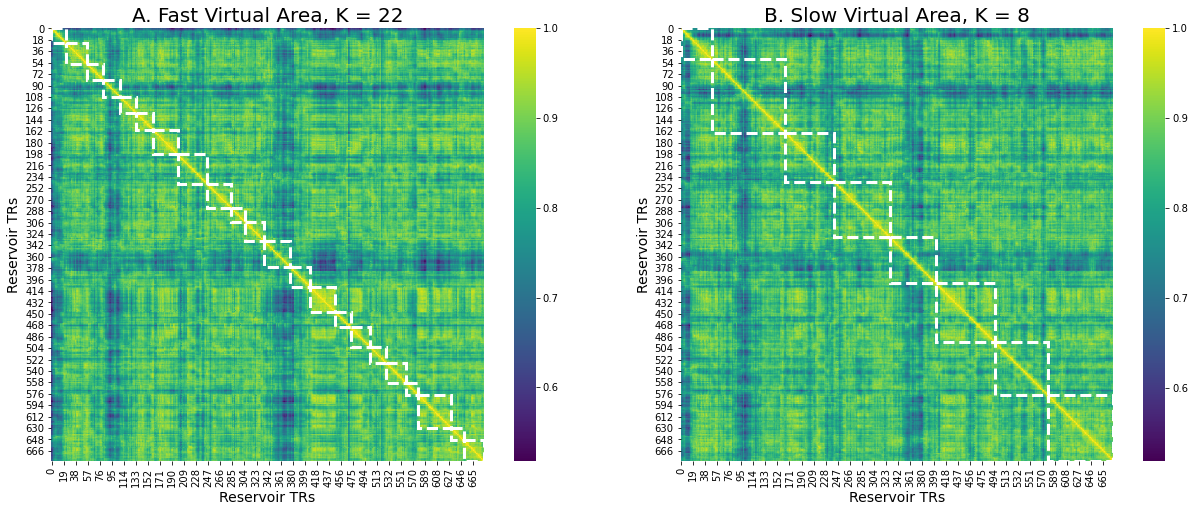

In [12]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time1),cmap=color)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time2),cmap=color)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('CHARM13072021.png')

In [13]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [41]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if p<0.05:
            print(i,j,t,p)


5 7 2.4056730091089773 0.026490513849338752


(20, 20)
49
0.4448743697491119
0.4627445596194997


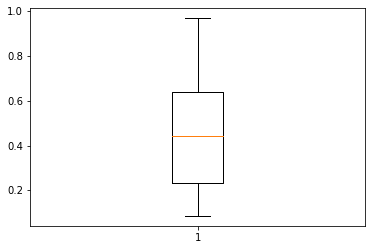

In [42]:
print(pmatrix.shape)

pmeans=np.zeros([50])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(3,8):
    for j in range(9,19):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()

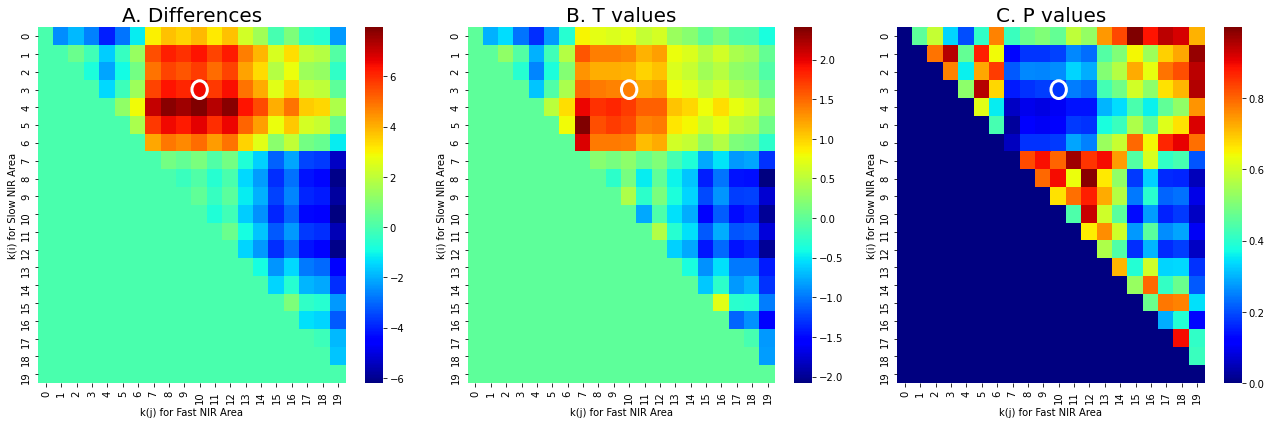

In [16]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('CHARMWIP1.png')

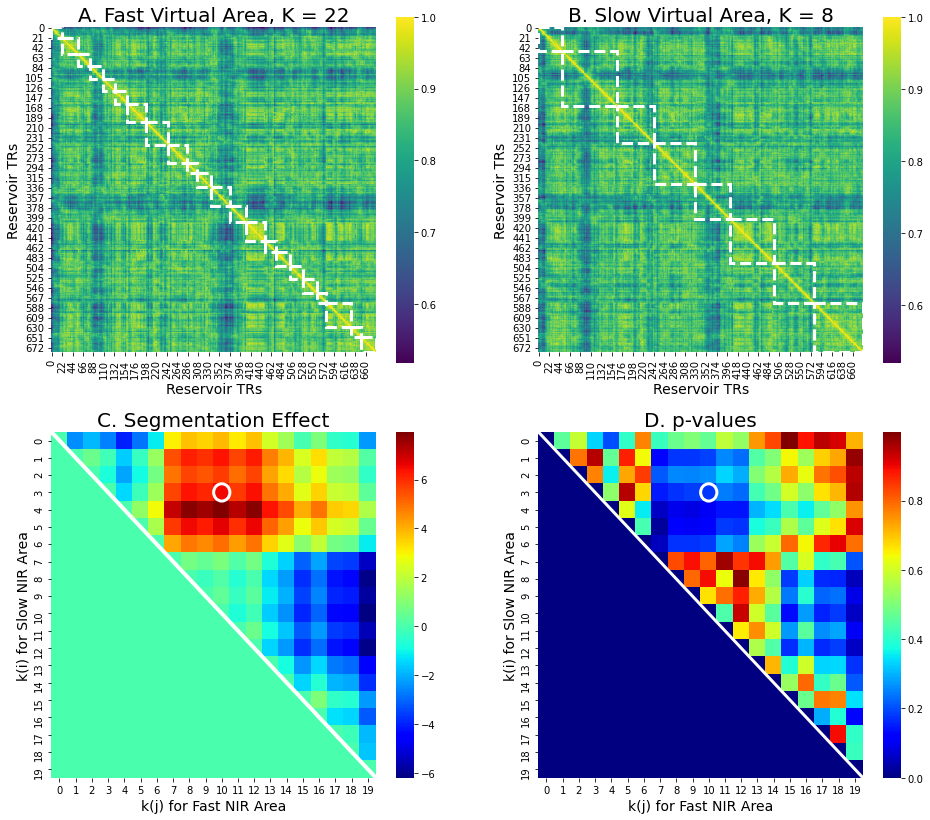

In [17]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time1),cmap=color)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time2),cmap=color)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-Combined.png', dpi=600)


In [18]:
for j in range(99):
    mean = NTF_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        NTF_time1[:,j] = NTF_time1[:,j]/mean

for j in range(99):
    mean = NTF_time2[:,j].mean()
    if abs(mean) > 0.01:
        NTF_time2[:,j] = NTF_time2[:,j]/mean

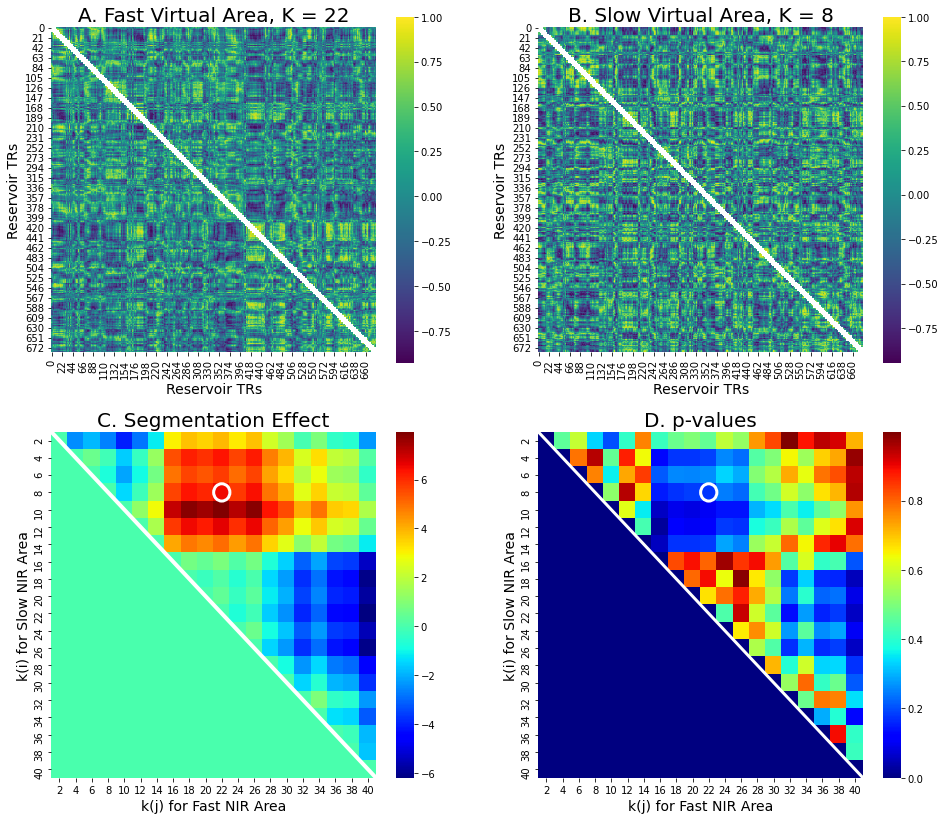

In [43]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time1),cmap=color)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(NTF_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(NTF_time2),cmap=color)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('CHARMWIP3-control.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

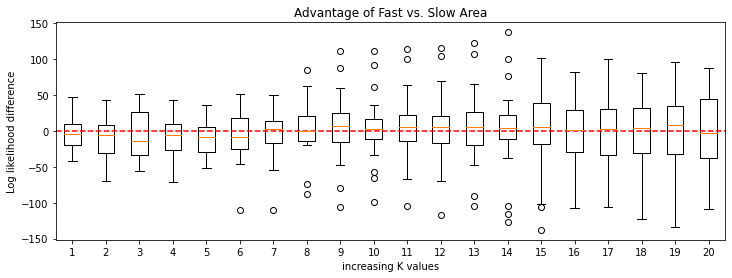

In [20]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,0].T-likelihood[:,:,1].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([1., 1., 5., 4., 2., 1., 2., 2., 0., 2.]),
 array([-1280.10618445, -1274.75437681, -1269.40256917, -1264.05076152,
        -1258.69895388, -1253.34714624, -1247.9953386 , -1242.64353095,
        -1237.29172331, -1231.93991567, -1226.58810803]),
 <BarContainer object of 10 artists>)

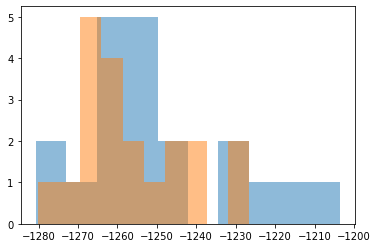

In [21]:
data3 = (likelihood[3,:,0]+ likelihood[10,:,1])/2
data4 = (likelihood[10,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fce7b290f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce7b298850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fce7b290ad0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fce7b2a3150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fce7b2a3590>,
 'means': []}

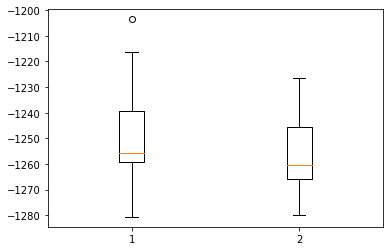

In [22]:
plt.boxplot([data4,data3])

In [23]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

1.4036678377197116
0.17655132924478478
6.528650742644777


In [24]:
print(np.shape(likelihood))
print(kvalues)

(20, 20, 2)
20


<AxesSubplot:>

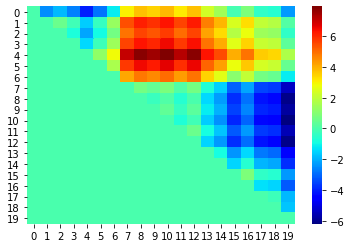

In [25]:
sns.heatmap(dmatrix,cmap='jet')

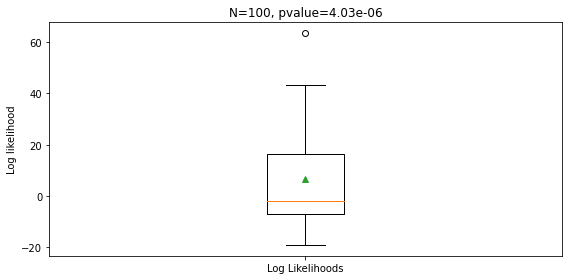

In [26]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

In [27]:
#likelihood = np.load('likelihood-june10.npy')

In [28]:
#np.save('NTF-time1-june6.npy', NTF_time1) 
#np.save('NTF-time2-june6.npy', NTF_time2) 

#np.save('likelihood-june6.npy', likelihood) 

#NTF_time1 = np.load('NTF-time1-last-june10.npy')
#NTF_time2 = np.load('NTF-time2-last-june10.npy')

In [29]:
#NTF_time1 = np.load('NTF-time1-june10.npy')
#NTF_time2 = np.load('NTF-time2-june10.npy')

In [30]:
# save likelihood scores
print('liklihood')
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


liklihood
[-933.18619509]
[-1052.4440078]


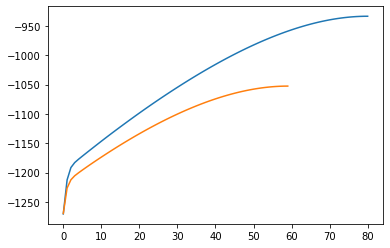

In [31]:
plt.plot(ev_time1.ll_)
plt.plot(ev_time2.ll_)

In [32]:
NTF_time1 = NTF_time1_cumul/reps
NTF_time2 = NTF_time2_cumul/reps

In [33]:
NTF_time1 = NTF_time1_last
NTF_time2 = NTF_time2_last

In [34]:
ev_time1 = brainiak.eventseg.event.EventSegment(200)
ev_time1.fit(NTF_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(200)
ev_time2.fit(NTF_time2)

EventSegment(event_chains=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             n_events=200)

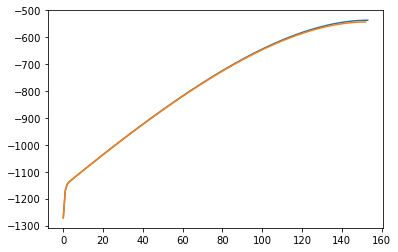

In [35]:
plt.plot(ev_time1.ll_)
plt.plot(ev_time2.ll_)

In [36]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis',square=True)

ax = plt.gca()

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis',square=True)

ax = plt.gca()

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('CHARMwip.png')

In [37]:
print(NTF_time1.shape)

(682, 99)


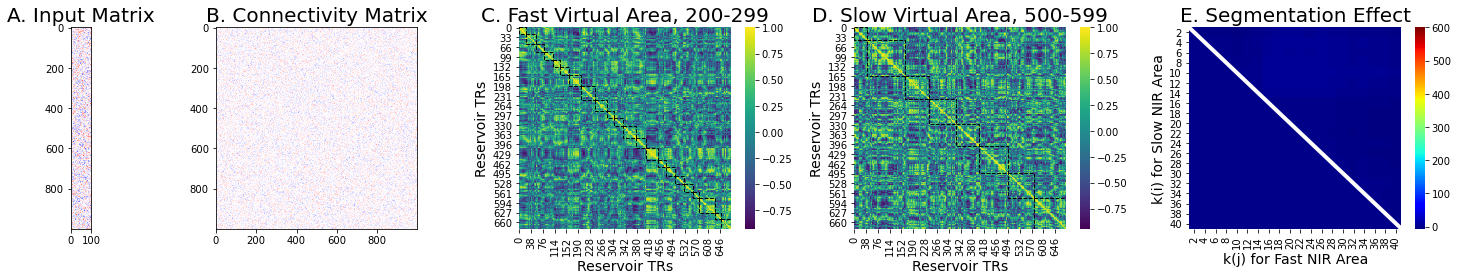

In [47]:

# 3 display the segmentation
color='gist_rainbow'
ec='black'
scale=0.3
lw=1

fs1 = 14
fs2 = 20

nTR=682
fig= plt.figure(figsize=(20,4))

gs = gridspec.GridSpec(1, 5,width_ratios=[1,4,4,4,4])
plt.subplot(gs[2])


bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

sns.heatmap(np.corrcoef(NTF_time1), cmap = 'viridis')

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('C. Fast Virtual Area, 200-299', fontsize = fs2)

plt.subplot(gs[3])
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

sns.heatmap(np.corrcoef(NTF_time2), cmap = 'viridis')
ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('D. Slow Virtual Area, 500-599', fontsize = fs2)

plt.subplot(gs[0])
plt.imshow(esn._WInput,cmap='seismic' )
plt.title('A. Input Matrix', fontsize = fs2)

plt.subplot(gs[1])
plt.imshow(esn._W,cmap='seismic' )
plt.title('B. Connectivity Matrix', fontsize = fs2)

plt.subplot(gs[4])
ax =sns.heatmap(dmatrix, cmap='jet', xticklabels=A1, yticklabels=A2)
plt.title('E. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.tight_layout()
plt.savefig('MatrixSegmentationExhaustiveControl.png')

In [38]:
for j in range(99):
    mean = NTF_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        NTF_time1[:,j] = NTF_time1[:,j]/mean

for j in range(99):
    mean = NTF_time2[:,j].mean()
    if abs(mean) > 0.01:
        NTF_time2[:,j] = NTF_time2[:,j]/mean
